In [66]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
import warnings 

from mlxtend.plotting import plot_confusion_matrix
##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [67]:
## warning 
import warnings 
warnings.filterwarnings('ignore')

In [68]:
## load the dataset
mushroom = pd.read_csv('mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [69]:
mushroom = mushroom.drop(['stalk-root', 'veil-type'], axis=1)
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [70]:
print(mushroom.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   


In [71]:
## Label encoding the whole data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mushroom= mushroom.apply(LabelEncoder().fit_transform)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [72]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = mushroom.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,...,-0.33,-0.30,-0.15,-0.15,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,...,-0.03,-0.03,-0.03,-0.03,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,...,0.09,0.11,0.07,0.07,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,...,-0.06,-0.05,0.00,0.01,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,...,0.46,0.46,0.08,0.09,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,...,0.12,0.06,0.17,0.17,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,...,-0.09,-0.12,0.10,0.10,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,...,-0.21,-0.21,0.27,0.25,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,...,0.06,0.01,0.30,0.28,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,...,0.22,0.26,-0.06,-0.07,-0.10,0.10,0.63,-0.42,-0.03,-0.20


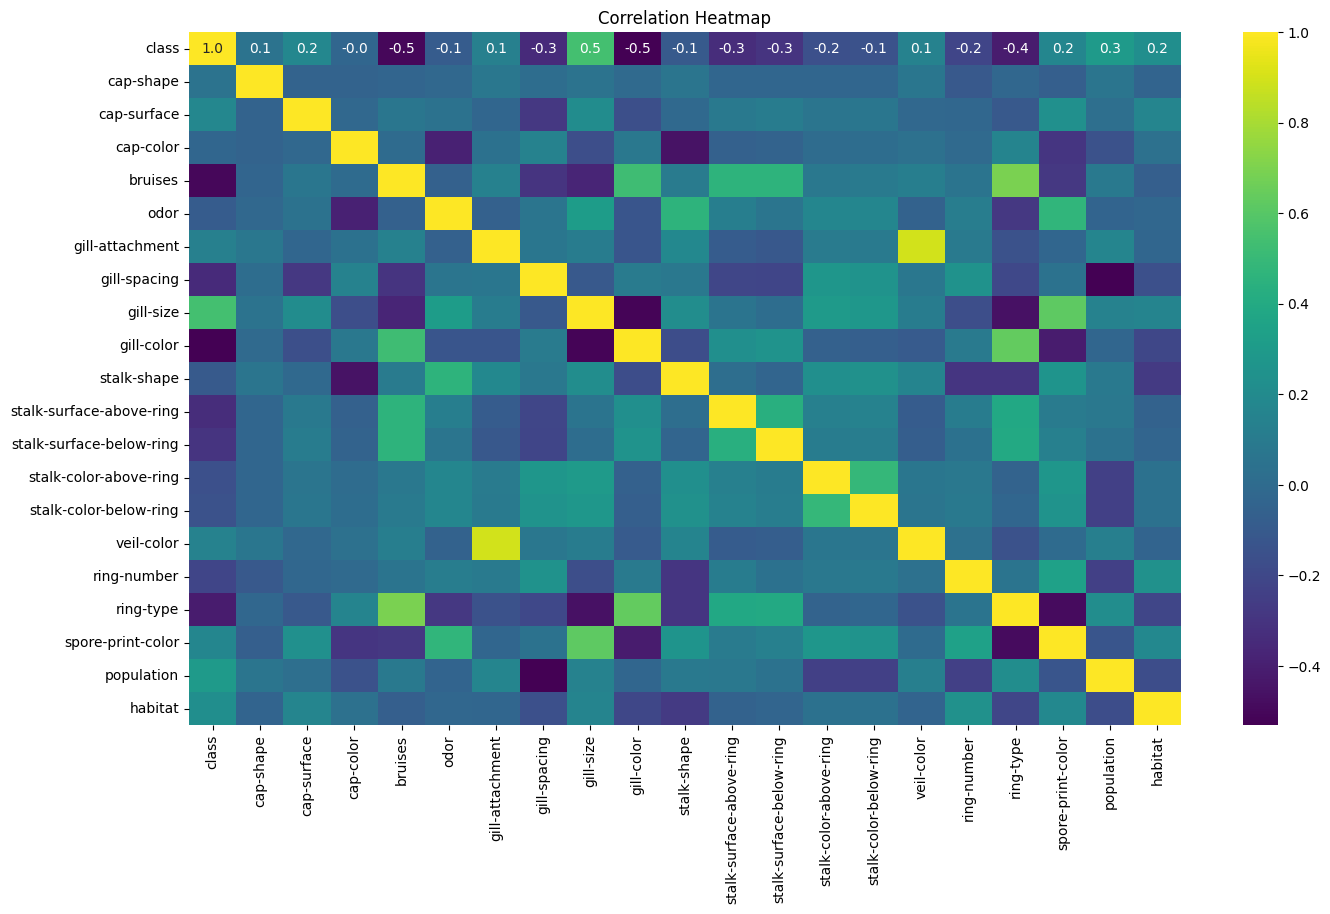

In [73]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = mushroom.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat


plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True, cmap="viridis", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [74]:
## Creat variables
x = mushroom.iloc[:, 1:21]
y = mushroom.iloc[:, 0]

In [75]:
## splitting our data
## 80 % training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [76]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5201,5,2,0,1,2,1,0,0,7,1,2,0,7,7,2,1,4,1,3,1
4388,2,3,9,0,2,1,0,0,7,0,1,1,0,0,2,1,2,1,4,1
5937,2,3,5,1,5,1,0,0,1,0,2,2,7,7,2,2,0,7,1,6
6000,5,3,2,0,2,1,0,1,0,1,1,2,6,6,2,1,0,7,4,4
2891,5,3,2,1,5,1,0,0,9,1,2,2,7,3,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,5,0,2,1,5,1,0,0,5,1,2,2,3,3,2,1,4,3,4,0
1334,2,2,8,0,5,1,1,0,3,1,2,2,7,7,2,1,0,2,0,1
8069,3,2,4,0,5,0,0,0,5,0,2,2,5,5,0,1,4,3,1,2
1579,2,3,4,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,1


In [77]:
x_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6506,2,3,2,0,2,1,0,1,0,1,2,2,6,6,2,1,0,7,4,4
5656,5,3,3,0,2,1,0,0,2,0,1,1,6,6,2,1,2,1,4,0
4908,5,3,3,0,2,1,0,0,2,0,1,1,4,0,2,1,2,1,5,1
1384,2,2,3,0,5,1,1,0,3,1,0,0,7,7,2,1,0,2,0,1
3305,2,3,2,1,5,1,0,0,5,1,2,2,3,6,2,1,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,5,3,3,1,5,1,0,0,7,1,2,2,6,7,2,1,4,2,5,0
1169,0,2,8,1,0,1,0,0,2,0,2,2,7,7,2,1,4,3,2,3
3650,2,3,2,1,5,1,0,0,9,1,2,2,3,6,2,1,4,3,5,0
2828,5,3,3,1,5,1,0,0,7,1,2,2,3,6,2,1,4,3,5,0


## LOGISTIC Regression Model

In [78]:
## LOGISTIC REGRESSION
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log= log_reg.predict(x_test)

In [79]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predited':y_pred_log}).sample(10)

,Actual,Predited
2221,0,0
2933,0,0
7071,1,1
6995,1,1
5960,1,1
3848,0,0
1723,0,0
2805,0,0
5437,1,1
331,0,0


In [80]:
## model evaluation
accuracy_Log_reg = accuracy_score(y_test, y_pred_log )

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_log)

print('Accuracy_Log_Reg', (metrics.accuracy_score(y_test, y_pred_log))*100, '%')
print(accuracy_Log_reg)
print(conf_mat)


Accuracy_Log_Reg 95.38461538461539 %
0.9538461538461539
[[815  31]
 [ 44 735]]


In [81]:
## classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       846
           1       0.96      0.94      0.95       779

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



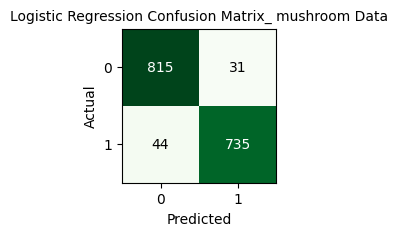

In [82]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_log)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix_ mushroom Data', fontsize = 10)
plt.show()

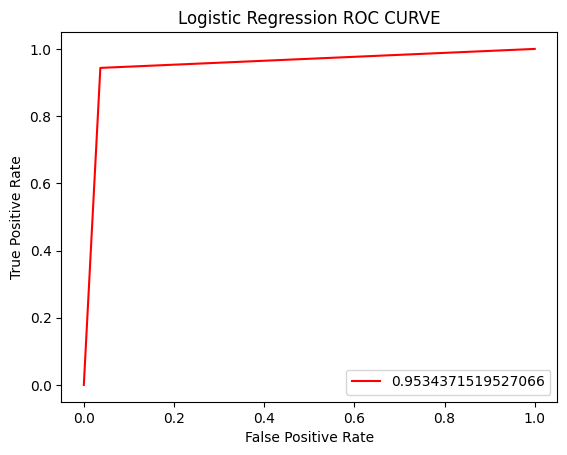

In [83]:
## Accuracy 
auc_LR = roc_auc_score(y_test, y_pred_log)
fpr, tpr, _ = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, color = 'RED', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC CURVE')
plt.legend()
plt.show()

##%  Logistic Regression of combination of all features shows 99.47% of accuracy

## SVM Model  
## calculating accuracy for Linear, Sigmoid and Rbf       
SVM is effective when the data is high-dimensional and the number of features (attributes) is relatively large.•

In [84]:
## support vector machine
clflinear = svm.SVC(kernel = 'linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel = 'rbf')


In [85]:

## for the model
clflinear.fit(x_train, y_train)
clfsigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [86]:
## make prediction

y_pred_linear = clflinear.predict(x_test)
y_pred_sigmoid = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

In [87]:
## model evalution for SVM
print('Accuracy (linear):', (metrics.accuracy_score(y_test, y_pred_linear))*100, '%')
print('Accuracy (sigmoid):', (metrics.accuracy_score(y_test, y_pred_sigmoid))*100, '%')
print('Accuracy (rbf):', (metrics.accuracy_score(y_test, y_pred_rbf))*100, '%')


Accuracy (linear): 96.43076923076923 %
Accuracy (sigmoid): 46.76923076923077 %
Accuracy (rbf): 99.2 %


In [88]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       846
           1       0.97      0.96      0.96       779

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [89]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49       846
           1       0.45      0.45      0.45       779

    accuracy                           0.47      1625
   macro avg       0.47      0.47      0.47      1625
weighted avg       0.47      0.47      0.47      1625



In [90]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       846
           1       1.00      0.98      0.99       779

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



calculating the classificatio report for SVM

In [91]:
## This code is for whole SVM, and not separatelylinear, sigmoid, rbf
SVM = svm.SVC()
SVM.fit(x_train, y_train)
SVM_pred = SVM.predict(x_test)

print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       846
           1       1.00      0.98      0.99       779

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



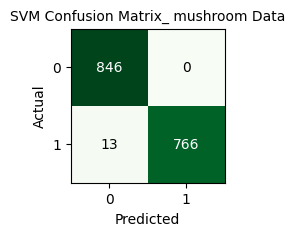

In [92]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test,SVM_pred)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('SVM Confusion Matrix_ mushroom Data', fontsize = 10)
plt.show()

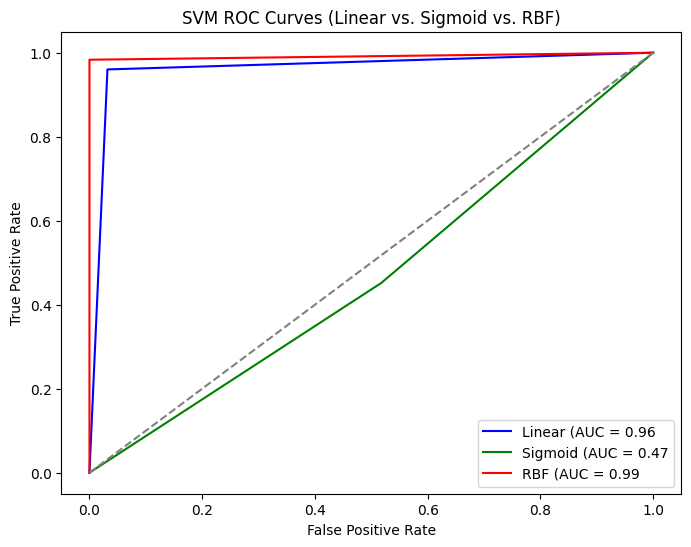

In [93]:


# Calculate ROC metrics for all three models
auc_linear = roc_auc_score(y_test, y_pred_linear)
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred_linear)

auc_sigmoid = roc_auc_score(y_test, y_pred_sigmoid)
fpr_sigmoid, tpr_sigmoid, _ = roc_curve(y_test, y_pred_sigmoid)

auc_rbf = roc_auc_score(y_test, y_pred_rbf)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_pred_rbf)

# Plot all three ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', label=f'Linear (AUC = {auc_linear:.2f}')
plt.plot(fpr_sigmoid, tpr_sigmoid, color='green', label=f'Sigmoid (AUC = {auc_sigmoid:.2f}')
plt.plot(fpr_rbf, tpr_rbf, color='red', label=f'RBF (AUC = {auc_rbf:.2f}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curves (Linear vs. Sigmoid vs. RBF)')
plt.legend()
plt.show()


&&& Combind curves of the three different SVM kernels (Linear, sigmoid and RBF)///AUC for each one has been presented in one plot

###  NAIVE BAYS GAUSSIAN                
%%  Naive Bays Model:Naive Bayes works well with categorical and discrete features.A simple and computationally efficient algorithm,

In [94]:
## create our naive bayes model
gaussian_model = GaussianNB()
## train our model
gaussian_model.fit(x_train, y_train)

GaussianNB()

In [95]:
## Make a prediction
y_pred_GaussianNB = gaussian_model.predict(x_test)

In [96]:
## create a dataframe for prediction
pd.DataFrame({'Actual Survived': y_test, 'Predicted Survived': y_pred_GaussianNB}).sample(10)

,Actual Survived,Predicted Survived
81,1,1
757,0,0
6136,1,1
2715,0,0
3044,0,0
4692,1,1
6087,1,1
6472,1,1
1887,1,1
1553,0,0


In [97]:
## model evaluation forGaussianNB
accuracy_GaussianNB = accuracy_score(y_test, y_pred_GaussianNB)

In [98]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_GaussianNB)
print('Accuracy (y_pred_GaussianNB):', (metrics.accuracy_score(y_test, y_pred_GaussianNB))*100, '%')

Accuracy (y_pred_GaussianNB): 91.93846153846154 %


In [99]:
print(accuracy_GaussianNB)
print(conf_mat)

0.9193846153846154
[[772  74]
 [ 57 722]]


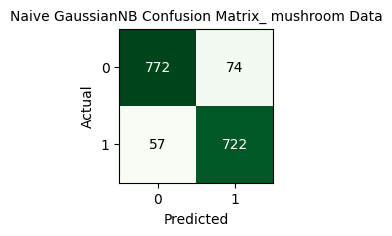

In [100]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_GaussianNB)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Naive GaussianNB Confusion Matrix_ mushroom Data', fontsize = 10)
plt.show()

In [101]:
## classification report
print(classification_report(y_test,y_pred_GaussianNB))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       846
           1       0.91      0.93      0.92       779

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



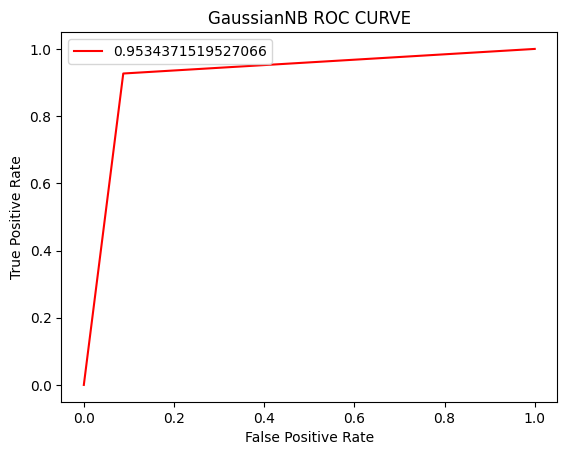

In [102]:
auc_GaussianNB = roc_auc_score(y_test, y_pred_GaussianNB)
fpr, tpr, _ = roc_curve(y_test, y_pred_GaussianNB)
plt.plot(fpr, tpr, color = 'RED', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB ROC CURVE')
plt.legend()
plt.show()

%% Naive Bays (Gaussian) accuracy = 92.0 %

##  ANN Model


In [103]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [104]:
## Initialize the model of neural network
model = Sequential()

In [105]:
## input layers---unit is the number of neurons,
model.add(Dense(units= 16, kernel_initializer = 'uniform', activation = 'relu',input_dim = 21))

In [106]:
## hidden layers, the first neuron was  16so the second layer we make it half =8 and we don't need input_dim
##I tried afre units and the best ones was 64 and  which gave me max accuracy
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))

In [107]:
## regularization--which help us to stop overfitting- we need to select the percentage of dropout like 25%
model.add(Dropout(0.25))

In [108]:
# the activation also will change from relu to sigmoid( because it is binary and the result is 0 and 1)
model.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [109]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                352       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model with an adjusted input layer
model = Sequential()
# Adjust input_dim to match our data
model.add(Dense(units=16, activation='relu', input_dim=20)) 

# Add other layers to the model
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model and train it
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.25)


Epoch 1/20


153/153 [==============================] - 2s 4ms/step - loss: 0.5374 - accuracy: 0.7417 - val_loss: 0.3297 - val_accuracy: 0.9138
Epoch 2/20
153/153 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.9173 - val_loss: 0.1827 - val_accuracy: 0.9508
Epoch 3/20
153/153 [==============================] - 1s 4ms/step - loss: 0.1607 - accuracy: 0.9528 - val_loss: 0.1176 - val_accuracy: 0.9680
Epoch 4/20
153/153 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9698 - val_loss: 0.0748 - val_accuracy: 0.9809
Epoch 5/20
153/153 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9822 - val_loss: 0.0496 - val_accuracy: 0.9889
Epoch 6/20
153/153 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9908 - val_loss: 0.0366 - val_accuracy: 0.9914
Epoch 7/20
153/153 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9928 - val_loss: 0.0280 - val_accuracy: 0.9932
Epoch 8/20
153/15

##We can save the result and you don't want to run again

In [112]:
## Save my model--- give it a name
model.save('mushroom_model')

INFO:tensorflow:Assets written to: mushroom_model\assets


INFO:tensorflow:Assets written to: mushroom_model\assets


In [113]:
##Load saved model-we want to see our saved model
ANN_mushroom_model = tf.keras.models.load_model('mushroom_model')

In [114]:
##now we need to prediction like the other models
## model prediction on the test data---before we just said model predict but here has been save in a file so we 
y_pred_ANN= ANN_mushroom_model.predict(x_test)
y_pred_ANN

51/51 [==============================] - 0s 2ms/step


array([[9.9990511e-01],
       [9.9954355e-01],
       [9.9999988e-01],
       ...,
       [1.0624949e-04],
       [7.6549964e-05],
       [9.9967837e-01]], dtype=float32)

In [115]:
## set a threshold-- we need to put it in this variable....
y_pred_ANN = np.where(y_pred_ANN > 0.5, 1, 0)  ## if it is bigger than 0.5 put 1 , else put 0
y_pred_ANN

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [116]:
y_test

6506    1
5656    1
4908    1
1384    0
3305    0
       ..
3602    0
1169    0
3650    0
2828    0
4376    1
Name: class, Length: 1625, dtype: int32

In [117]:
y_pred_ANN.shape

(1625, 1)

In [118]:
y_test.shape

(1625,)

In [119]:
##we need to flatten ---inserting the changes in them , we don't use the new name it will be confuesing
y_pred_ANN= y_pred_ANN.flatten()

In [120]:
### put them in datafram
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ANN}).sample(10)

,Actual,Predicted
5602,1,1
7787,1,1
3762,0,0
3221,0,0
7944,0,0
3316,0,0
5919,1,1
5647,1,1
4282,1,1
2554,0,0


In [121]:
## classification report
print(classification_report(y_test, y_pred_ANN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [122]:
print('Accuracy (y_pred_ANN):', (metrics.accuracy_score(y_test, y_pred_ANN))*100, '%')

Accuracy (y_pred_ANN): 100.0 %


In [123]:
print(conf_mat)

[[772  74]
 [ 57 722]]


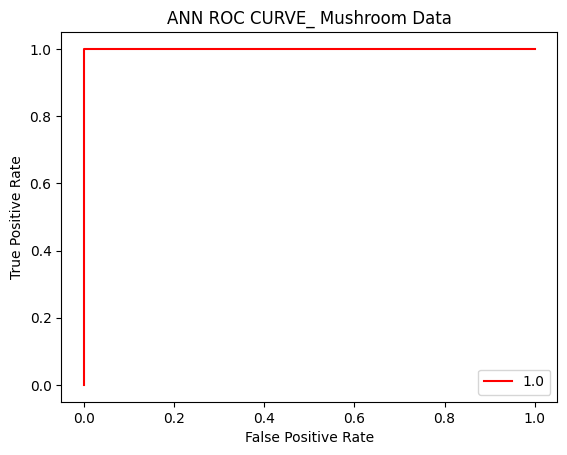

In [124]:
auc_ANN= roc_auc_score(y_test, y_pred_ANN)
fpr, tpr, _ = roc_curve(y_test, y_pred_ANN)
plt.plot(fpr, tpr, color = 'Red', label = auc_ANN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE_ Mushroom Data')
plt.legend()
plt.show()

In [125]:
print(ANN_mushroom_model)
print(conf_mat)

[[772  74]
 [ 57 722]]


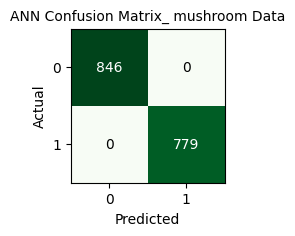

In [126]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_ANN)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix_ mushroom Data', fontsize = 10)
plt.show()

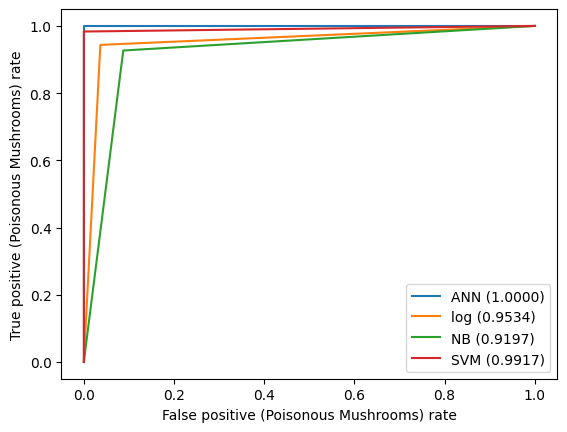

In [128]:
from sklearn.metrics import roc_curve

fpr_ANN, tpr_ANN = roc_curve(y_test, y_pred_ANN)[0:2]
fpr_log, tpr_log = roc_curve(y_test, y_pred_log)[0:2]

fpr_GaussianNB, tpr_GaussianNB = roc_curve(y_test, y_pred_GaussianNB)[0:2]
fpr_SVM, tpr_SVM = roc_curve(y_test, SVM_pred)[0:2]

cba = []
predictions = [y_pred_ANN, y_pred_log, y_pred_GaussianNB, SVM_pred]
for i in predictions:
    cba.append(roc_auc_score(y_test, i))

plt.plot(fpr_ANN, tpr_ANN , label=f"ANN ({cba[0]:.4f})")
plt.plot(fpr_log, tpr_log, label=f"log ({cba[1]:.4f})")
plt.plot(fpr_GaussianNB, tpr_GaussianNB , label=f"NB ({cba[2]:.4f})")
plt.plot(fpr_SVM, tpr_SVM, label=f"SVM ({cba[3]:.4f})")
plt.xlabel("False positive (Poisonous Mushrooms) rate")
plt.ylabel("True positive (Poisonous Mushrooms) rate")
plt.legend()
plt.show()